In [12]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/120-years-of-olympic-history-athletes-and-results/noc_regions.csv
/kaggle/input/120-years-of-olympic-history-athletes-and-results/athlete_events.csv


## Reading Data Set

In [13]:
import pandas as pd

In [14]:
df_athlete=pd.read_csv("/kaggle/input/120-years-of-olympic-history-athletes-and-results/athlete_events.csv")

1. Plot the distribution of medals by country
2. Plot the number of athletes in each sport
3. Top countries with the most gold medals
4. Plot the top countries with the most gold medals
5. Convert the 'Year' column to datetime
6. Plot the number of medals over time

Exploring Dataset

In [15]:
df_athlete.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [16]:
df_athlete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [17]:
df_athlete.isna().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [18]:
df_athlete=df_athlete.dropna()

In [19]:
df_noc=pd.read_csv("/kaggle/input/120-years-of-olympic-history-athletes-and-results/noc_regions.csv")

In [20]:
df_athlete.NOC

40        FIN
41        FIN
42        FIN
44        FIN
48        FIN
         ... 
271078    URS
271080    URS
271082    POL
271102    RUS
271103    RUS
Name: NOC, Length: 30181, dtype: object

In [21]:
dis_medal=df_athlete.groupby('Team')['Medal'].count().sort_values(ascending=False).reset_index().head(10)

In [22]:
dis_medal

,Team,Medal
0,United States,4273
1,Soviet Union,2203
2,Germany,1518
3,Australia,1196
4,Russia,1091
5,Canada,1024
6,Great Britain,1010
7,Italy,1008
8,France,965
9,East Germany,935


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

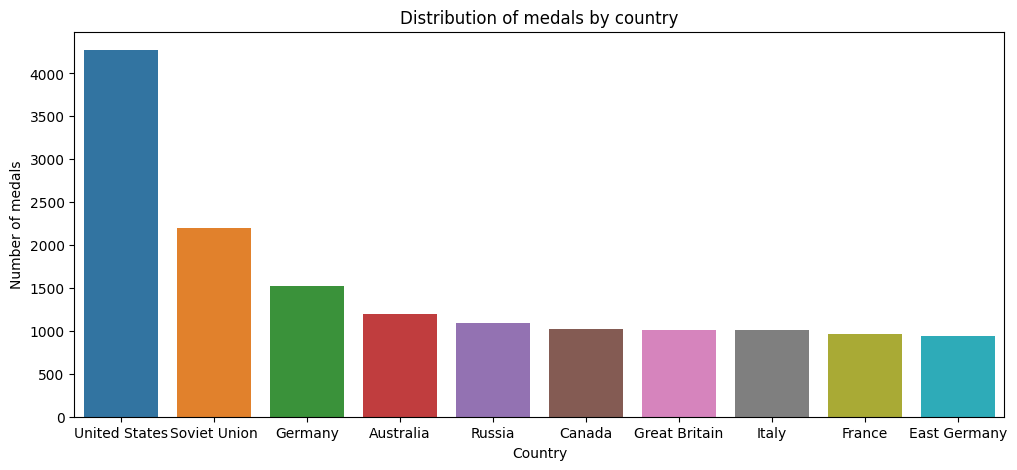

In [24]:
plt.figure(figsize=(12,5))
sns.barplot(x='Team',y='Medal',data=dis_medal)
plt.title("Distribution of medals by country")
plt.xlabel("Country")
plt.ylabel("Number of medals")
plt.show()

In [25]:
sport_athlete=df_athlete.groupby('Sport')['Name'].nunique().sort_values(ascending=False).reset_index(name='No of athletes').head(10)

Text(0.5, 1.0, 'Sport wise athlete count')

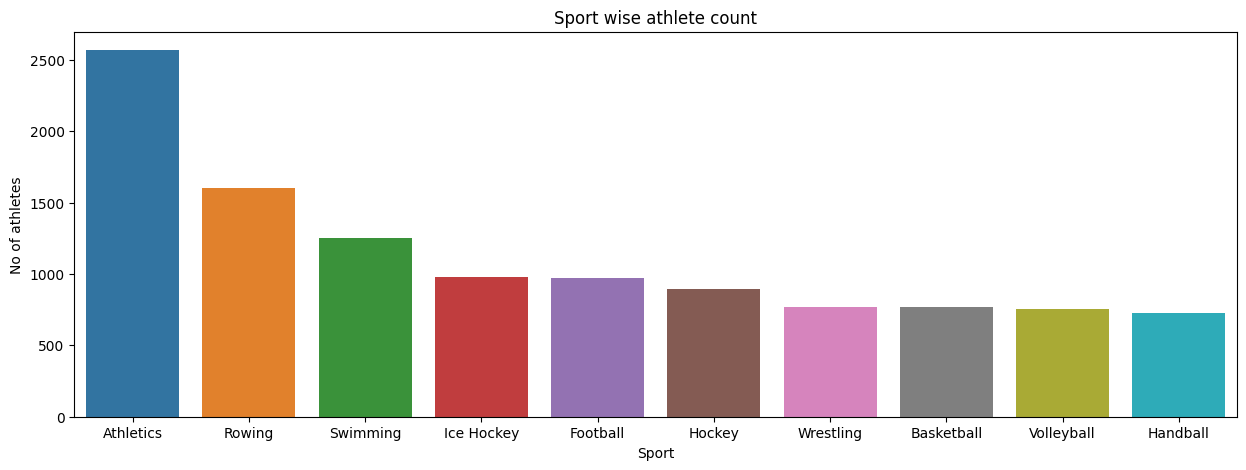

In [26]:
plt.figure(figsize=(15,5))
sns.barplot(x='Sport',y='No of athletes',data=sport_athlete)
plt.title("Sport wise athlete count")

In [27]:
gold_df=df_athlete[df_athlete['Medal']=='Gold']

In [28]:
df_gold=gold_df.Team.value_counts().reset_index(name='gold medals').head(10)

Text(0.5, 1.0, 'Country wise gold medals')

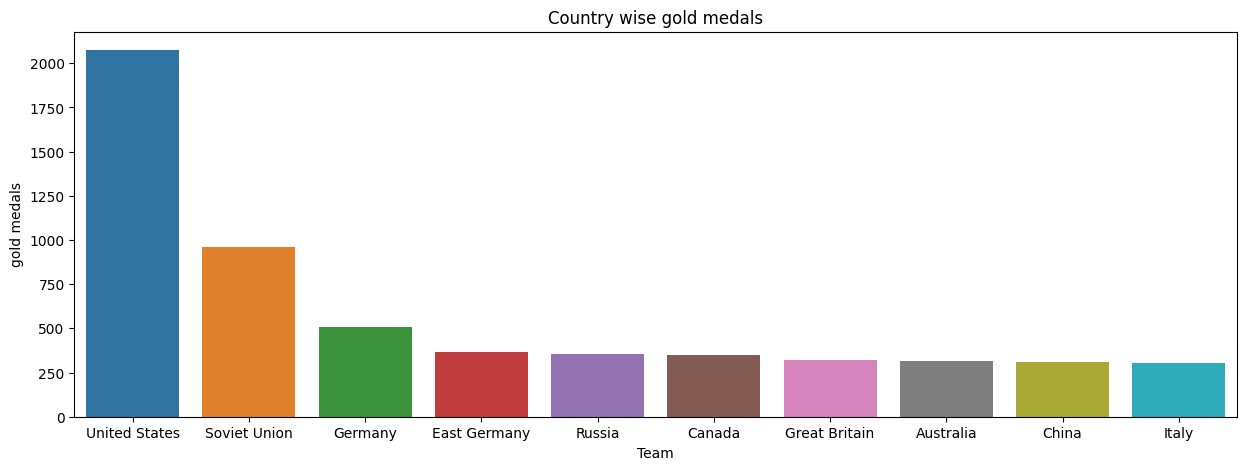

In [29]:
plt.figure(figsize=(15,5))
sns.barplot(x='Team',y='gold medals',data=df_gold)
plt.title("Country wise gold medals")

In [30]:
df_athlete['Year']=pd.to_datetime(df_athlete['Year'],format="%Y").dt.year

In [31]:
year=df_athlete.Year.value_counts().reset_index()

In [32]:
year=year.sort_values(by='Year')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Year', ylabel='count'>

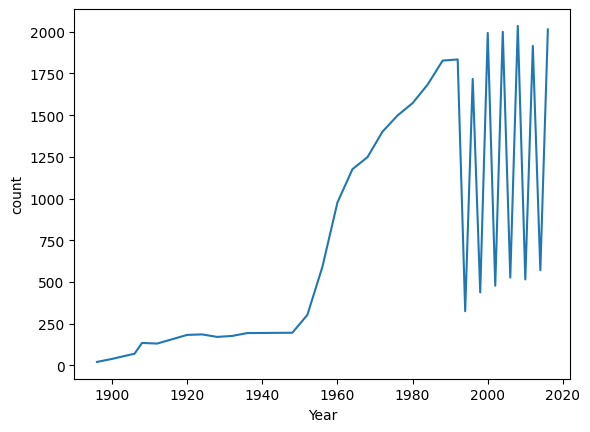

In [33]:
sns.lineplot(x='Year',y='count',data=year)